In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from scipy.stats import boxcox,t

In [ ]:
df = pd.read_excel("Team 11.xlsx")

In [ ]:
df.head()

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,y,x10
0,1,7.13,55.7,4.1,9.0,39.6,279,2,4,207,241,60.0
1,2,8.82,58.2,1.6,3.8,51.7,80,2,2,51,52,40.0
2,3,8.34,56.9,2.7,8.1,74.0,107,2,3,82,54,20.0
3,4,8.95,53.7,5.6,18.9,122.8,147,2,4,53,148,40.0
4,5,11.20,56.5,5.7,34.5,88.9,180,2,1,134,151,40.0


In [ ]:
df.isnull().sum()

id     0
x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
y      0
x10    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Y'] = df['y']
df = df.drop(['id','y'], axis=1)

In [ ]:
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,Y
0,7.13,55.7,4.1,9.0,39.6,279,2,4,207,60.0,241
1,8.82,58.2,1.6,3.8,51.7,80,2,2,51,40.0,52
2,8.34,56.9,2.7,8.1,74.0,107,2,3,82,20.0,54
3,8.95,53.7,5.6,18.9,122.8,147,2,4,53,40.0,148
4,11.20,56.5,5.7,34.5,88.9,180,2,1,134,40.0,151


In [ ]:
input_columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10']
num_columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6','x9', 'x10']
cat_columns = ['x7', 'x8']

In [ ]:
# # Standard scaling of input variables

# for column in num_columns:
#     df[column] = (df[column]-np.mean(df[column]))/np.sqrt(np.var(df[column]))
# df.head()

In [ ]:
df1 = df.copy()

# Box Tidwell

In [ ]:
# Code for Box-Tidwell transformation

# Here we have to find alpha such that y = beta0 + beta1 * zeta is linear with zeta
# Procedure:
# zeta = x^alpha if alpha != 0
#      = log(x)  if alpha = 0

# E(y) = f(zeta, beta0, beta1) = beta0 + beta1*zeta       where alpha , beta0, beta1 are unknown  ---------- (1)
# We initialize the value of alpha = alpha_0 = 1 and using taylor series expansion we expand E(y) about alpha_0,
# E(y) = f(zeta_0, beta0, beta1) + (alpha - alpha_0)*{df(zeta_0, beta0, beta1)/d alpha}(at alpha = alpha_0)
#      = beta0 + beta1 * x + (alpha - 1)*beta1*x*ln(x)
#      = beta0 + beta1 * x + gamma * w      where gamma = (alpha -1)*beta1 , w = xln(x)    --------- (2)

# Now we can estimate gamma using MLR method on model-2 and beta1 using OLS method on model-1

# Therefore the estimated value of alpha is alpha_hat given as,
# alpha_hat = gamma_hat/beta1_hat + 1



def box_tidwell(y,x):
  y = np.array(y)
  x = np.array(x)
  xlog_x = x*np.log(x)
  x_with_cons = sm.add_constant(x)

  model1 = sm.OLS(y, x_with_cons).fit()
  beta1_hat = model1.params[-1]

  x_with_log = np.concatenate((x_with_cons, xlog_x.reshape(-1, 1)), axis=1)
  model2 = sm.OLS(y, x_with_log).fit()

  gamma_hat = model2.params[-1]

  alpha_hat = gamma_hat/beta1_hat + 1

  return x**alpha_hat

In [ ]:
for column in input_columns:
    df1[column] = box_tidwell(df1['Y'], df1[column])

In [ ]:
df2 = df.copy()
for column in input_columns:
    df2[column] = np.log(df2[column])

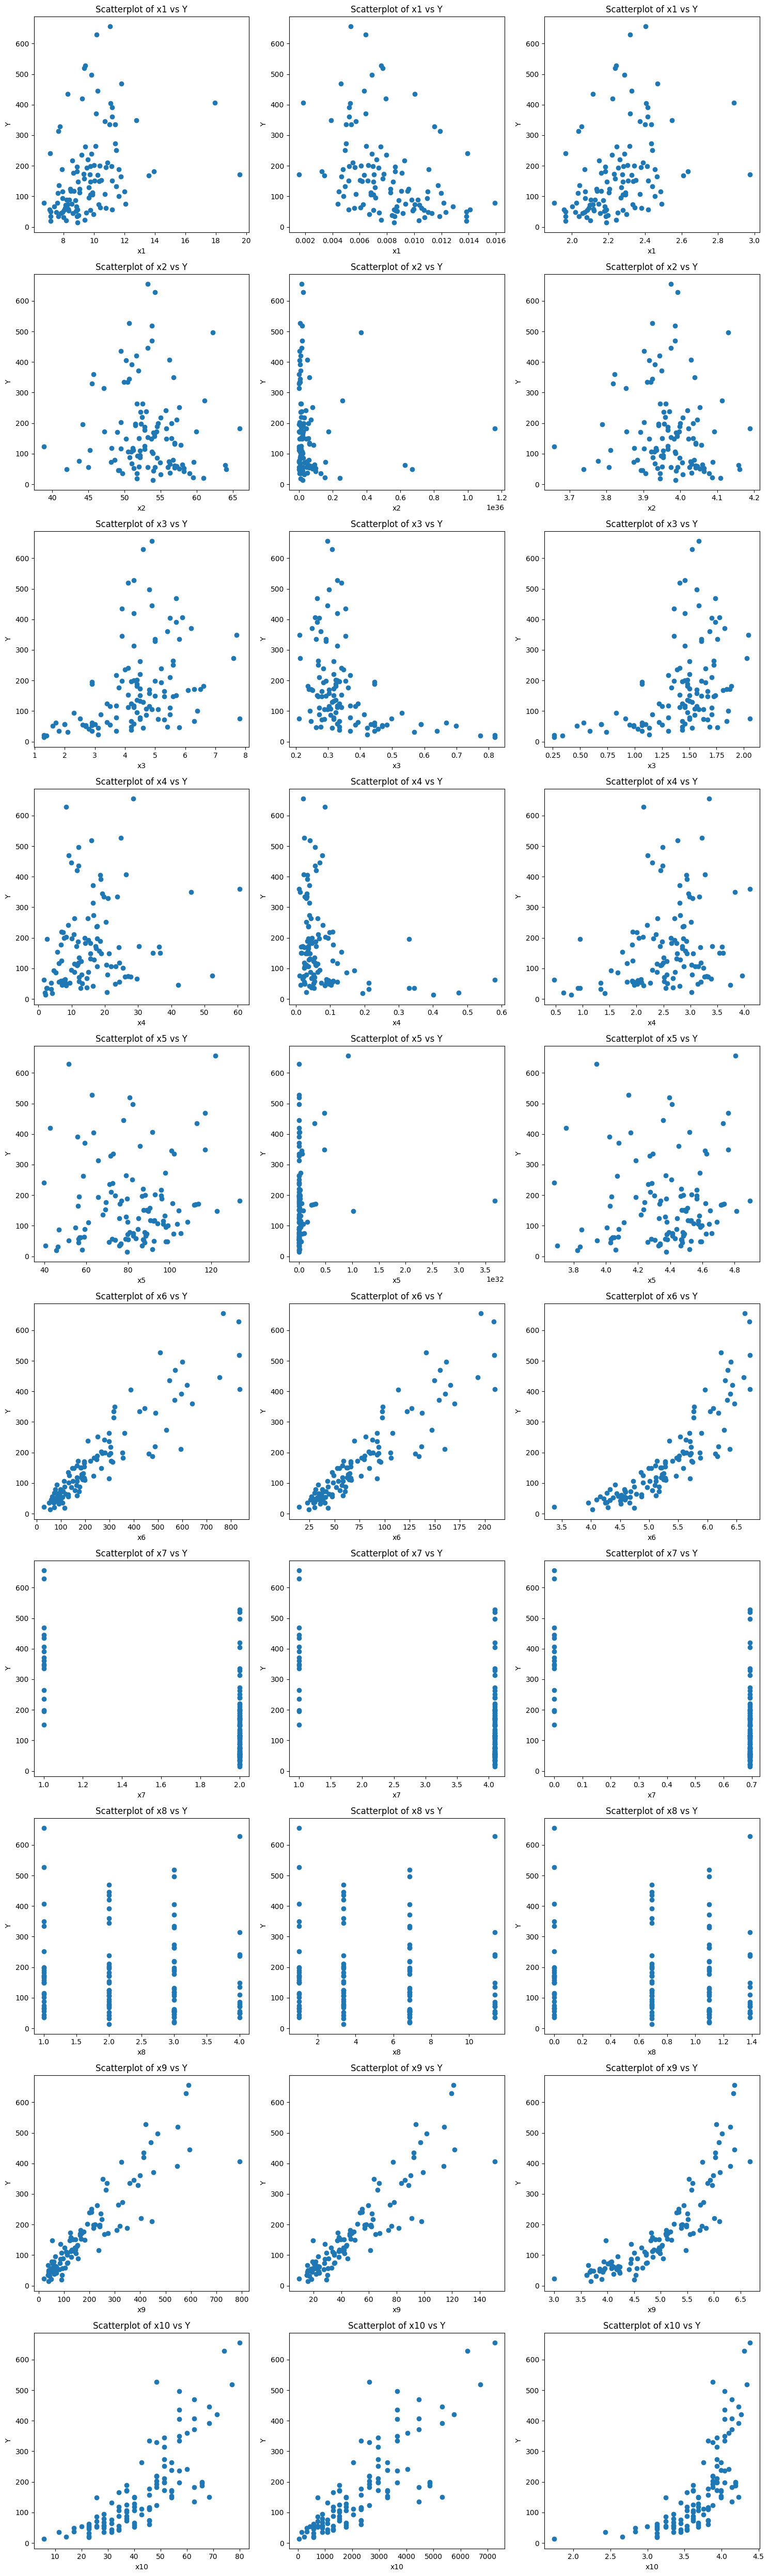

In [ ]:
# Create subplots
fig, axs = plt.subplots(10, 3, figsize=(15, 50))

# Plot scatterplots
for row in range(10):
    for col, (data, ax) in enumerate(zip([df, df1, df2], axs[row])):
        ax.scatter(data.iloc[:, row], data.iloc[:, 10])
        ax.set_xlabel(data.columns[row])
        ax.set_ylabel(data.columns[10])
        ax.set_title(f'Scatterplot of {data.columns[row]} vs {data.columns[10]}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


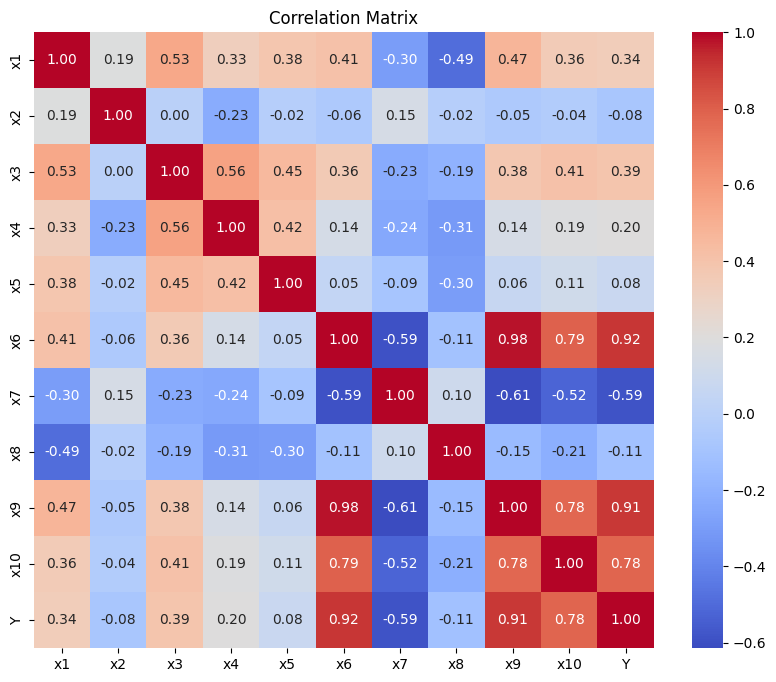

In [ ]:
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# # Standard scaling of input variables

# for column in num_columns:
#     df[column] = (df[column]-np.mean(df[column]))/np.sqrt(np.var(df[column]))
# df.head()

In [ ]:
X = df[input_columns]
Y = df['Y']



In [ ]:
X = sm.add_constant(X)

model_full = sm.OLS(Y, X).fit()

In [ ]:
print(model_full.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     65.17
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           9.71e-40
Time:                        21:21:38   Log-Likelihood:                -604.65
No. Observations:                 113   AIC:                             1231.
Df Residuals:                     102   BIC:                             1261.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.8353     84.360      0.472      0.6

In [ ]:
Y_pred = model_full.predict(X)
residual_full = Y-Y_pred

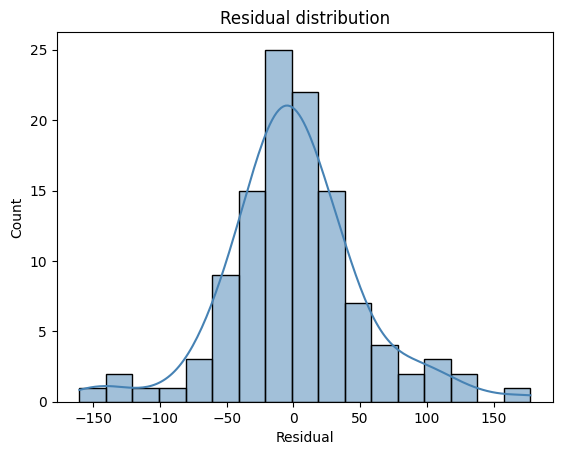

In [ ]:
# Checking normality of residuals

sns.histplot(residual_full, kde=True, color="steelblue")
plt.xlabel("Residual")
plt.title("Residual distribution")
plt.show()

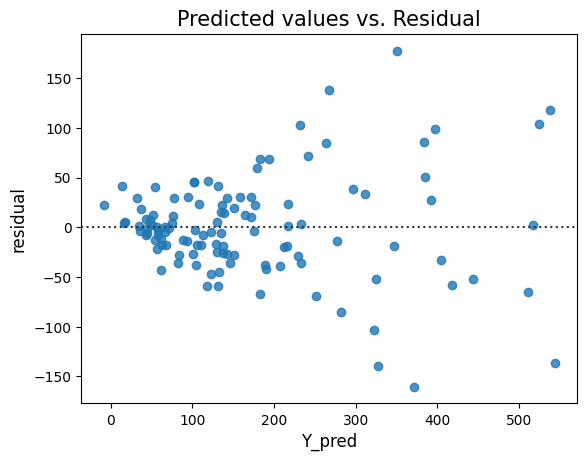

In [ ]:
sns.residplot(x=Y_pred, y=residual_full)
plt.xlabel("Y_pred", fontsize = 12)
plt.ylabel("residual", fontsize = 12)
plt.title("Predicted values vs. Residual", fontsize=15)
plt.show()

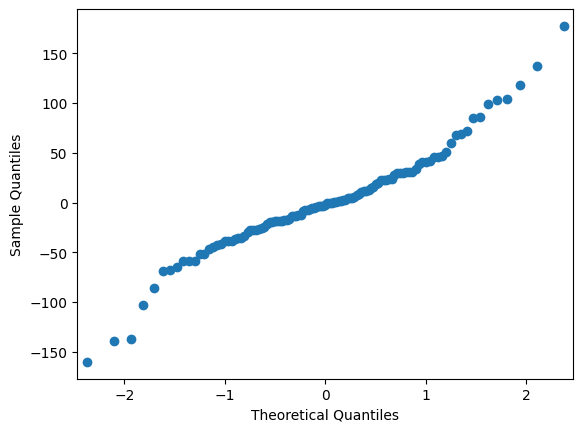

In [ ]:
# QQ plot
# sm.qqplot(residual_full)
sm.qqplot(residual_full)
plt.show()

# **Applying Box Cox on Y**

In [ ]:
# Applying boxcox transformation on output variable
df['Y'], lambda_value = boxcox(df['Y'])
print("lambda value in box cox :",lambda_value)

lambda value in box cox : 0.1003348684549647


In [ ]:
X = df[input_columns]
Y = df['Y']


In [ ]:
X = sm.add_constant(X)
model_full_1 = sm.OLS(Y, X).fit()

In [ ]:
print(model_full_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     63.46
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           3.08e-39
Time:                        21:21:39   Log-Likelihood:                -81.932
No. Observations:                 113   AIC:                             185.9
Df Residuals:                     102   BIC:                             215.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2818      0.826      5.182      0.0

In [ ]:
Y_pred_1 = model_full_1.predict(X)
residual_full_1 = Y - Y_pred_1

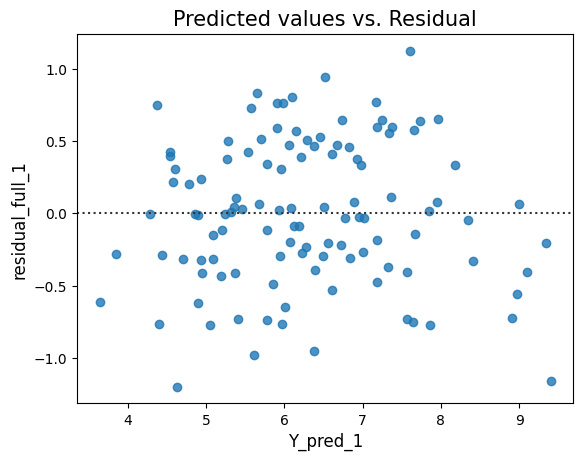

In [ ]:
sns.residplot(x=Y_pred_1, y=residual_full_1)
plt.xlabel("Y_pred_1", fontsize = 12)
plt.ylabel("residual_full_1", fontsize = 12)
plt.title("Predicted values vs. Residual", fontsize=15)
plt.show()

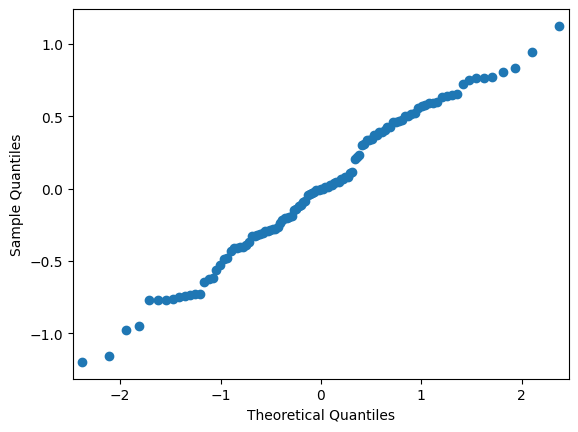

In [ ]:
sm.qqplot(residual_full_1)
plt.show()

## Custom selecting columns of Box Tidwell and log transformation


In [ ]:
df['x1'] = df2['x1']
df['x4'] = df2['x4']
df['x6'] = df1['x6']
df['x9'] = df1['x9']
df['x10'] = df1['x10']

In [ ]:
# Standard scaling of input variables

for column in num_columns:
    df[column] = (df[column]-np.mean(df[column]))/np.sqrt(np.var(df[column]))
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,Y
0,-1.613084,0.555660,-0.190917,-0.508458,-2.180123,0.216404,2,4,0.199464,1.113077,7.313524
1,-0.412562,1.118492,-2.063630,-1.754113,-1.552463,-0.967500,2,2,-1.010667,-0.366782,4.849106
2,-0.728388,0.825819,-1.239637,-0.660672,-0.395702,-0.786290,2,3,-0.732486,-1.242136,4.905315
3,-0.329982,0.105394,0.932711,0.563420,2.135687,-0.534148,2,4,-0.991643,-0.366782,6.488494
4,0.935725,0.735766,1.007619,1.432838,0.377202,-0.336765,2,1,-0.318743,-0.366782,6.521660


In [ ]:
X = df[input_columns]
Y = df['Y']


In [ ]:
X = sm.add_constant(X)

model_full_2 = sm.OLS(Y, X).fit()
print(model_full_2.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     62.49
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           6.00e-39
Time:                        21:21:39   Log-Likelihood:                -82.680
No. Observations:                 113   AIC:                             187.4
Df Residuals:                     102   BIC:                             217.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8218      0.383     15.202      0.0

In [ ]:
Y_pred_2 = model_full_2.predict(X)
residual_full_2 = Y - Y_pred_2

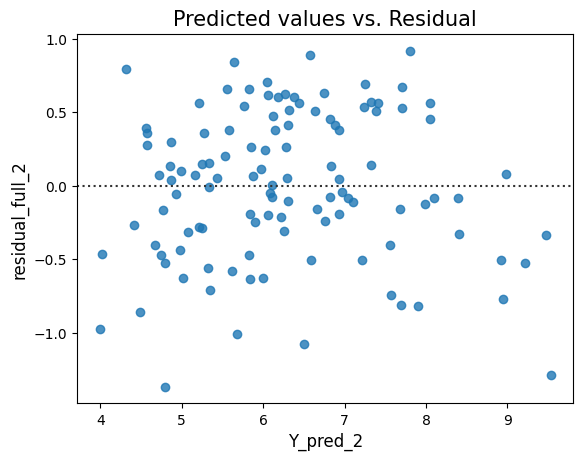

In [ ]:
sns.residplot(x=Y_pred_2, y=residual_full_2)
plt.xlabel("Y_pred_2", fontsize = 12)
plt.ylabel("residual_full_2", fontsize = 12)
plt.title("Predicted values vs. Residual", fontsize=15)
plt.show()

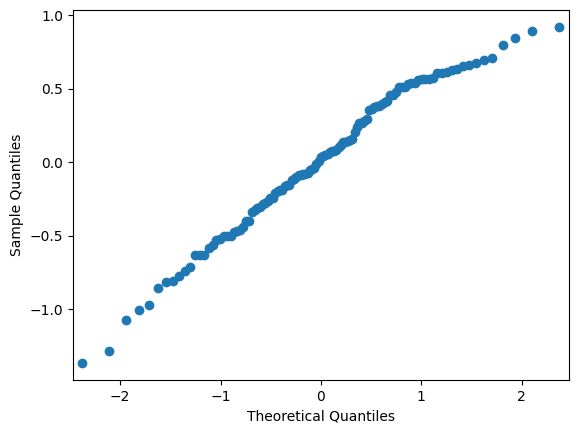

In [ ]:
sm.qqplot(residual_full_2)
plt.show()

In [ ]:
len(residual_full_2)

113

In [ ]:
# !pip install --upgrade scipy
# from scipy.stats import brownforsythe

# group1 = residual_full_2[0:40]
# group2 = residual_full_2[40:79]

# # Perform Brown-Forsythe test
# test_statistic, p_value = brownforsythe(group1, group2)

In [ ]:
X = X.drop('const', axis=1)

# **Cooks Distance**

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence

In [ ]:
X = df[input_columns]
y = df['Y']
X

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,-1.613084,0.555660,-0.190917,-0.508458,-2.180123,0.216404,2,4,0.199464,1.113077
1,-0.412562,1.118492,-2.063630,-1.754113,-1.552463,-0.967500,2,2,-1.010667,-0.366782
2,-0.728388,0.825819,-1.239637,-0.660672,-0.395702,-0.786290,2,3,-0.732486,-1.242136
3,-0.329982,0.105394,0.932711,0.563420,2.135687,-0.534148,2,4,-0.991643,-0.366782
4,0.935725,0.735766,1.007619,1.432838,0.377202,-0.336765,2,1,-0.318743,-0.366782
...,...,...,...,...,...,...,...,...,...,...
108,1.230257,0.127907,1.007619,-0.492494,1.829638,1.658581,1,2,1.622280,1.378302
109,0.006612,-0.885190,1.082528,1.717025,-0.556507,-0.845518,2,3,-0.854124,-1.152297
110,-1.179015,0.825819,0.033808,-0.068963,-0.712125,-0.645598,2,4,-0.707118,1.378302
111,3.594683,0.668226,1.157436,1.046242,0.527633,2.830241,1,1,3.431432,1.378302


In [ ]:
X = sm.add_constant(X)  # Add a constant term (intercept)

model = sm.OLS(y, X).fit()
X.head()

,const,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,1.0,-1.613084,0.555660,-0.190917,-0.508458,-2.180123,0.216404,2,4,0.199464,1.113077
1,1.0,-0.412562,1.118492,-2.063630,-1.754113,-1.552463,-0.967500,2,2,-1.010667,-0.366782
2,1.0,-0.728388,0.825819,-1.239637,-0.660672,-0.395702,-0.786290,2,3,-0.732486,-1.242136
3,1.0,-0.329982,0.105394,0.932711,0.563420,2.135687,-0.534148,2,4,-0.991643,-0.366782
4,1.0,0.935725,0.735766,1.007619,1.432838,0.377202,-0.336765,2,1,-0.318743,-0.366782


In [ ]:
influence = OLSInfluence(model)
cooks_distance = influence.cooks_distance
cooks = list(cooks_distance)
cook = cooks[0]

In [ ]:
threshold = 4 / len(df)  # You can adjust the threshold as needed
threshold = 0.2
influential_observations = []
for i in range(len(df)):
  if cook[i] > threshold:
    influential_observations.append(i)
print("Influential Observations:", influential_observations)

Influential Observations: [111]


In [ ]:
print(len(influential_observations))

1


In [ ]:
X['cooks_dist'] = cook

<Axes: ylabel='cooks_dist'>

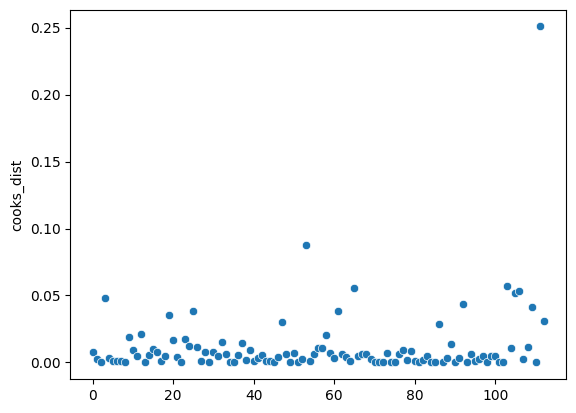

In [ ]:
sns.scatterplot(y = 'cooks_dist', x = range(113), data = X)

In [ ]:
df = df[~df.index.isin(influential_observations)]

In [ ]:
df = df.reset_index()

In [ ]:
df.drop("index", axis = 1, inplace = True)

In [ ]:
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,Y
0,-1.613084,0.555660,-0.190917,-0.508458,-2.180123,0.216404,2,4,0.199464,1.113077,7.313524
1,-0.412562,1.118492,-2.063630,-1.754113,-1.552463,-0.967500,2,2,-1.010667,-0.366782,4.849106
2,-0.728388,0.825819,-1.239637,-0.660672,-0.395702,-0.786290,2,3,-0.732486,-1.242136,4.905315
3,-0.329982,0.105394,0.932711,0.563420,2.135687,-0.534148,2,4,-0.991643,-0.366782,6.488494
4,0.935725,0.735766,1.007619,1.432838,0.377202,-0.336765,2,1,-0.318743,-0.366782,6.521660
...,...,...,...,...,...,...,...,...,...,...,...
107,-0.949205,0.398067,-1.689088,-1.754113,-1.822201,-0.892358,2,2,-1.078782,-1.152297,4.144679
108,1.230257,0.127907,1.007619,-0.492494,1.829638,1.658581,1,2,1.622280,1.378302,8.507330
109,0.006612,-0.885190,1.082528,1.717025,-0.556507,-0.845518,2,3,-0.854124,-1.152297,4.667970
110,-1.179015,0.825819,0.033808,-0.068963,-0.712125,-0.645598,2,4,-0.707118,1.378302,6.349479


# Univariate Analysis

Regression results for x1:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     23.27
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           4.56e-06
Time:                        21:21:40   Log-Likelihood:                -180.60
No. Observations:                 112   AIC:                             365.2
Df Residuals:                     110   BIC:                             370.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2838    

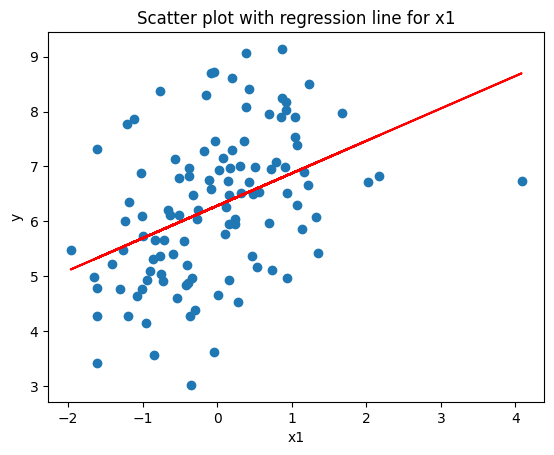

Regression results for x2:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     2.237
Date:                Fri, 26 Apr 2024   Prob (F-statistic):              0.138
Time:                        21:21:40   Log-Likelihood:                -190.21
No. Observations:                 112   AIC:                             384.4
Df Residuals:                     110   BIC:                             389.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2637    

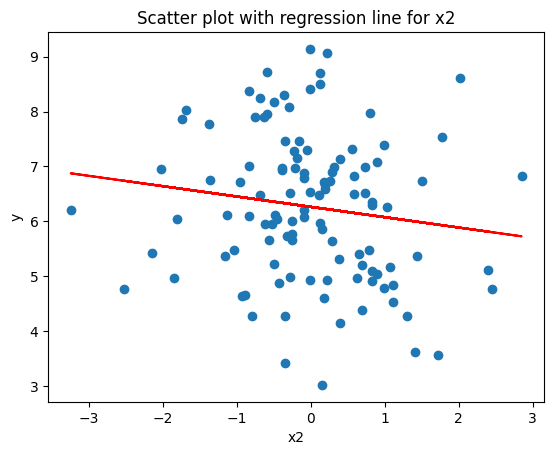

Regression results for x3:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     42.13
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           2.54e-09
Time:                        21:21:41   Log-Likelihood:                -173.18
No. Observations:                 112   AIC:                             350.4
Df Residuals:                     110   BIC:                             355.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2721    

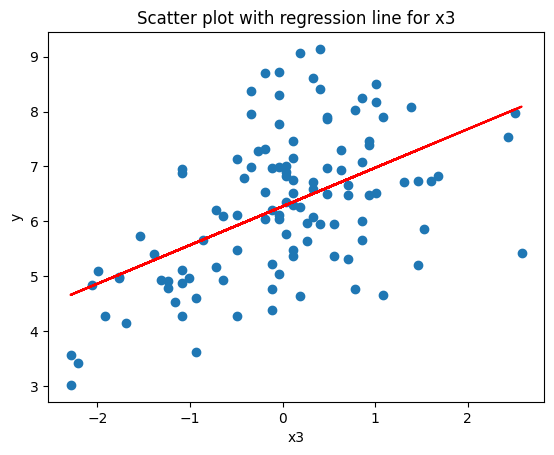

Regression results for x4:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     17.09
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           6.97e-05
Time:                        21:21:41   Log-Likelihood:                -183.25
No. Observations:                 112   AIC:                             370.5
Df Residuals:                     110   BIC:                             375.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2694    

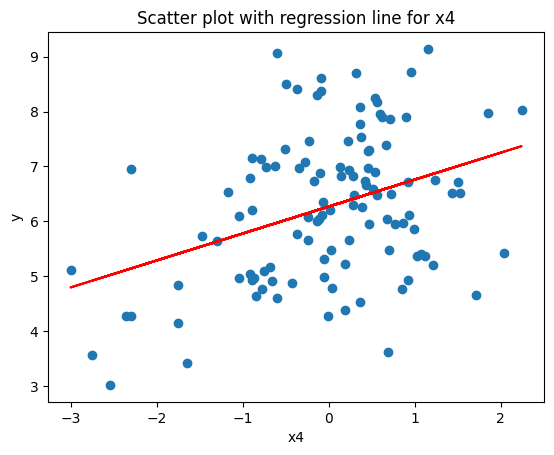

Regression results for x5:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     2.554
Date:                Fri, 26 Apr 2024   Prob (F-statistic):              0.113
Time:                        21:21:41   Log-Likelihood:                -190.06
No. Observations:                 112   AIC:                             384.1
Df Residuals:                     110   BIC:                             389.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2658    

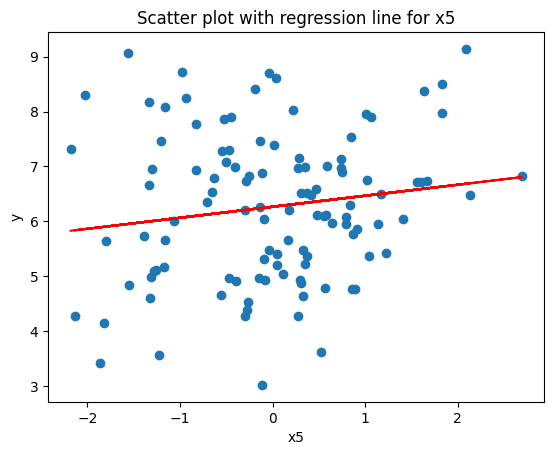

Regression results for x6:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     379.3
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           1.92e-37
Time:                        21:21:41   Log-Likelihood:                -107.76
No. Observations:                 112   AIC:                             219.5
Df Residuals:                     110   BIC:                             225.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2956    

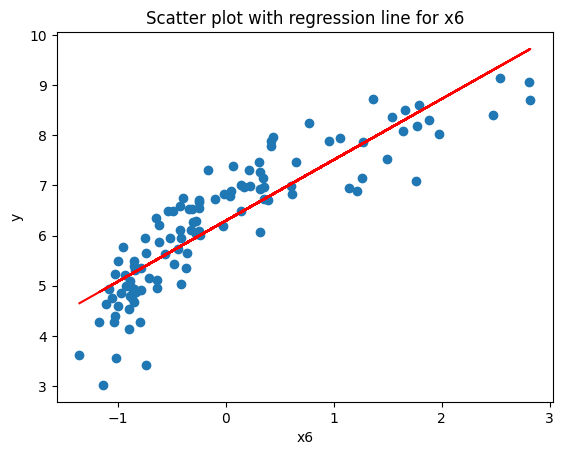

Regression results for x7:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     38.09
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           1.15e-08
Time:                        21:21:41   Log-Likelihood:                -174.69
No. Observations:                 112   AIC:                             353.4
Df Residuals:                     110   BIC:                             358.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.8602    

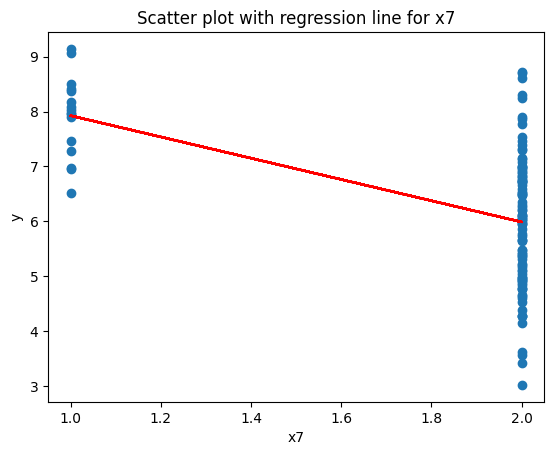

Regression results for x8:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     2.472
Date:                Fri, 26 Apr 2024   Prob (F-statistic):              0.119
Time:                        21:21:42   Log-Likelihood:                -190.10
No. Observations:                 112   AIC:                             384.2
Df Residuals:                     110   BIC:                             389.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7347    

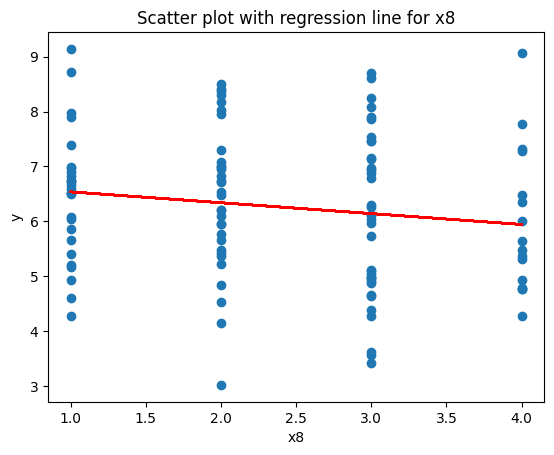

Regression results for x9:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     450.4
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           1.09e-40
Time:                        21:21:42   Log-Likelihood:                -100.17
No. Observations:                 112   AIC:                             204.3
Df Residuals:                     110   BIC:                             209.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3035    

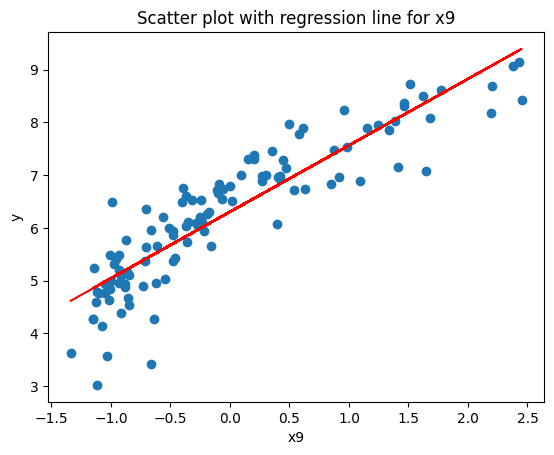

Regression results for x10:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     217.3
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           8.34e-28
Time:                        21:21:42   Log-Likelihood:                -130.28
No. Observations:                 112   AIC:                             264.6
Df Residuals:                     110   BIC:                             270.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2783   

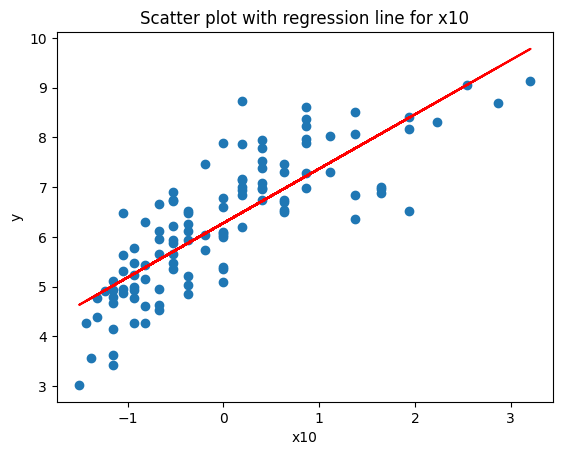

In [ ]:
# Iterate over all columns except the target variable
for col in df.columns[:-1]:
    # Prepare the data
    X = df[[col]]
    y = df["Y"]

    # Fit the linear regression model
    X = sm.add_constant(X)  # Add a constant term to the independent variable
    model = sm.OLS(y, X).fit()

    # Print the model summary
    print(f"Regression results for {col}:")
    print(model.summary())

    # Plot the data and regression line
    plt.scatter(X[col], y)
    plt.plot(X[col], model.predict(X), color="red")
    plt.title(f"Scatter plot with regression line for {col}")
    plt.xlabel(col)
    plt.ylabel("y")
    plt.show()

# **Finding Best Predictors**


In [ ]:
X = df[input_columns]
Y = df['Y']

**Backward**

In [ ]:
# Step 1: Choose a significance level (e.g., alpha = 0.05)
alpha = 0.05

# Step 2: Fit the initial model with all features
X['const'] = 1  # Add a constant term (intercept) to the model

# Step 3: Fit the model using OLS (Ordinary Least Squares)
model = sm.OLS(Y, X).fit()

# Step 8: Repeat Steps 3-7 until all p-values are below alpha
while True:
    # Step 4: Identify the feature with the highest p-value
    max_p_value = model.pvalues.max()

    # Step 5: Check if the highest p-value is greater than alpha
    if max_p_value > alpha:
        # Step 6: Remove the feature with the highest p-value
        feature_to_remove = model.pvalues.idxmax()
        X = X.drop(feature_to_remove, axis=1)

        # Step 7: Refit the model
        model = sm.OLS(Y, X).fit()
    else:
        break

features=list(X.columns)
print(features)
model_backward = model

['x3', 'x4', 'x9', 'x10', 'const']


In [ ]:
import statsmodels.api as sm

# Step 1: Choose a significance level (e.g., alpha = 0.05)
alpha = 0.05

# Step 2: Initialize an empty list to store selected features
selected_features = []

# Step 3: Loop until all features are included or significance level is reached
while True:
    # Step 4: Initialize an empty list to store candidate features and their p-values
    candidate_features = []
    p_values = []

    # Step 5: Loop over remaining features not already selected
    for feature in X.columns:
        if feature not in selected_features:
            # Add the feature to the candidate features
            candidate_features.append(feature)

            # Fit the model with the selected features plus the candidate feature
            X_selected = X[selected_features + [feature]]
            X_selected['const'] = 1  # Add a constant term
            model = sm.OLS(Y, X_selected).fit()

            # Get the p-value for the candidate feature
            p_value = model.pvalues[feature]
            p_values.append(p_value)

    # Step 6: Check if there are any candidate features left
    if not p_values:
        break

    # Step 7: Identify the candidate feature with the lowest p-value
    min_p_value = min(p_values)
    min_p_value_index = p_values.index(min_p_value)
    best_feature = candidate_features[min_p_value_index]

    # Step 8: Check if the lowest p-value is below alpha
    if min_p_value < alpha:
        # Include the best feature in the selected features
        selected_features.append(best_feature)
    else:
        # Stop the loop if no feature meets the significance level
        break

# Step 9: Fit the final model using the selected features
X_final = X[selected_features]
X_final['const'] = 1  # Add a constant term
model_forward = sm.OLS(Y, X_final).fit()

# Print selected features and final model summary
print("Selected Features:", selected_features)


Selected Features: ['const', 'x9', 'x4', 'x10', 'x3']


<ipython-input-1215-f5c13f68ccde>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected['const'] = 1  # Add a constant term
<ipython-input-1215-f5c13f68ccde>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected['const'] = 1  # Add a constant term
<ipython-input-1215-f5c13f68ccde>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [ ]:
import statsmodels.api as sm

# Step 1: Choose a significance level (e.g., alpha = 0.05)
alpha = 0.05

# Step 2: Initialize an empty list to store selected features
selected_features = []

# Step 3: Loop until all features are included or significance level is reached
while True:
    # Step 4: Initialize an empty list to store candidate features and their p-values
    candidate_features = []
    p_values = []

    # Step 5: Forward selection: Loop over remaining features not already selected
    for feature in X.columns:
        if feature not in selected_features:
            # Add the feature to the candidate features
            candidate_features.append(feature)

            # Fit the model with the selected features plus the candidate feature
            X_selected = X[selected_features + [feature]]
            X_selected['const'] = 1  # Add a constant term
            model = sm.OLS(Y, X_selected).fit()

            # Get the p-value for the candidate feature
            p_value = model.pvalues[feature]
            p_values.append(p_value)

    # Step 6: Check if any candidate features were selected during forward selection
    if not p_values:
        break

    # Step 7: Identify the candidate feature with the lowest p-value from forward selection
    min_p_value_forward = min(p_values)
    min_p_value_index_forward = p_values.index(min_p_value_forward)
    best_feature_forward = candidate_features[min_p_value_index_forward]

    # Step 8: Check if the lowest p-value from forward selection is below alpha
    if min_p_value_forward < alpha:
        # Include the best feature from forward selection in the selected features
        selected_features.append(best_feature_forward)
    else:
        # Stop the loop if no feature meets the significance level for forward selection
        break

    # Step 9: Backward elimination: Repeat backward elimination to remove non-significant features
    while True:
        # Fit the model with the selected features
        X_selected = X[selected_features]
        X_selected['const'] = 1  # Add a constant term
        model = sm.OLS(Y, X_selected).fit()

        # Step 10: Identify the feature with the highest p-value
        max_p_value = model.pvalues.max()

        # Step 11: Check if the highest p-value is greater than alpha
        if max_p_value > alpha:
            # Remove the feature with the highest p-value
            feature_to_remove = model.pvalues.idxmax()
            selected_features.remove(feature_to_remove)
        else:
            # Stop the backward elimination loop if all features are significant
            break

# Step 12: Fit the final model using the selected features
X_final = X[selected_features]
X_final['const'] = 1  # Add a constant term
model_stepwise = sm.OLS(Y, X_final).fit()

# Print selected features and final model summary
print("Selected Features:", selected_features)


Selected Features: ['const', 'x9', 'x4', 'x10', 'x3']


<ipython-input-1216-c145dee76eec>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected['const'] = 1  # Add a constant term
<ipython-input-1216-c145dee76eec>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected['const'] = 1  # Add a constant term
<ipython-input-1216-c145dee76eec>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [ ]:
import itertools

p = 10
n = len(X)

# Initialize dictionaries to store best models and their criterion values
best_models = {'AIC': {}, 'BIC': {}, 'Adjusted R Squared': {}, "Mallow's Statistic": {}, 'Press Residual': {}}

# Loop through different numbers of predictors
for num_predictors in range(1, p+1):
    # Generate all possible combinations of predictors
    predictor_combinations = itertools.combinations(df.columns[:-1], num_predictors)

    # Initialize variables to keep track of the best criterion value and corresponding model
    best_criterion_values = {'AIC': float('inf'), 'BIC': float('inf'), 'Adjusted R Squared': float('-inf'), "Mallow's Statistic": float('inf'), 'Press Residual': float('inf')}
    best_models_for_num_predictors = {'AIC': None, 'BIC': None, 'Adjusted R Squared': None, "Mallow's Statistic": None, 'Press Residual': None}

    # Loop through each combination of predictors
    for predictors in predictor_combinations:
        predictors = list(predictors)
        # Fit the model with the current combination of predictors
        model = sm.OLS(df['Y'], sm.add_constant(df[predictors])).fit()

        # Calculate criterion values
        aic = model.aic
        bic = model.bic
        adjusted_r_squared = model.rsquared_adj
        mallows = model.mse_resid + num_predictors * (model.params.shape[0] + 1) / (n - num_predictors - 1)
        press_residual = np.sum((model.predict() - df['Y'])**2) / (n - num_predictors)

        # Update best criterion values and models if necessary
        if aic < best_criterion_values['AIC']:
            best_criterion_values['AIC'] = aic
            best_models_for_num_predictors['AIC'] = model
        if bic < best_criterion_values['BIC']:
            best_criterion_values['BIC'] = bic
            best_models_for_num_predictors['BIC'] = model
        if adjusted_r_squared > best_criterion_values['Adjusted R Squared']:
            best_criterion_values['Adjusted R Squared'] = adjusted_r_squared
            best_models_for_num_predictors['Adjusted R Squared'] = model
        if abs(mallows - num_predictors) < abs(best_criterion_values["Mallow's Statistic"] - num_predictors):
            best_criterion_values["Mallow's Statistic"] = mallows
            best_models_for_num_predictors["Mallow's Statistic"] = model
        if press_residual < best_criterion_values['Press Residual']:
            best_criterion_values['Press Residual'] = press_residual
            best_models_for_num_predictors['Press Residual'] = model

    # Store the best models and their criterion values for the current number of predictors
    print("The number of predictors ", num_predictors)
    print(best_criterion_values)
    for criterion, model in best_models_for_num_predictors.items():
        best_models[criterion][num_predictors] = model

# Initialize lists to store results
aic_values = []
bic_values = []
adjusted_r_squared_values = []
mallows_values = []
press_residual_values = []

# Loop through best models to calculate criterion values
for num_predictors in range(1, p+1):
    aic_values.append(best_models['AIC'][num_predictors].aic)
    bic_values.append(best_models['BIC'][num_predictors].bic)
    adjusted_r_squared_values.append(best_models['Adjusted R Squared'][num_predictors].rsquared_adj)
    mallows_values.append(best_models["Mallow's Statistic"][num_predictors].mse_resid + num_predictors * (best_models["Mallow's Statistic"][num_predictors].params.shape[0] + 1) / (n - num_predictors - 1))
    press_residual_values.append(np.sum((best_models['Press Residual'][num_predictors].predict() - df['Y'])**2) / (n - num_predictors))

# Create a dataframe to store results
results_df = pd.DataFrame({
    'Number of Predictors': range(1, p+1),
    'AIC': aic_values,
    'BIC': bic_values,
    'Adjusted R Squared': adjusted_r_squared_values,
    "Mallow's Statistic": mallows_values,
    'Press Residual': press_residual_values
})


The number of predictors  1
{'AIC': 204.33030497448743, 'BIC': 209.76730271707763, 'Adjusted R Squared': 0.8019238106949872, "Mallow's Statistic": 1.3407698381880286, 'Press Residual': 0.35336811060243334}
The number of predictors  2
{'AIC': 183.55848245599236, 'BIC': 191.71397906987764, 'Adjusted R Squared': 0.8368835454510368, "Mallow's Statistic": 1.8432960614680942, 'Press Residual': 0.2909758608812192}
The number of predictors  3
{'AIC': 174.27273359626105, 'BIC': 185.14672908144144, 'Adjusted R Squared': 0.8511535212101949, "Mallow's Statistic": 1.888876779270886, 'Press Residual': 0.265497966143658}
The number of predictors  4
{'AIC': 171.07576768861733, 'BIC': 184.6682620450928, 'Adjusted R Squared': 0.8565744131122969, "Mallow's Statistic": 1.8267385988030251, 'Press Residual': 0.2558067697902093}
The number of predictors  5
{'AIC': 171.03898564915295, 'BIC': 187.3499788769235, 'Adjusted R Squared': 0.8578304259113334, "Mallow's Statistic": 1.678075776147771, 'Press Residual':

In [ ]:
results_df

,Number of Predictors,AIC,BIC,Adjusted R Squared,Mallow's Statistic,Press Residual
0,1,204.330305,209.767303,0.801924,1.340770,0.353368
1,2,183.558482,191.713979,0.836884,1.843296,0.290976
2,3,174.272734,185.146729,0.851154,1.888877,0.265498
3,4,171.075768,184.668262,0.856574,1.826739,0.255807
4,5,171.038986,187.349979,0.857830,1.678076,0.253544
5,6,171.577055,190.606547,0.858338,1.687008,0.252617
6,7,172.500041,194.248032,0.858344,1.622209,0.252583
7,8,173.968993,198.435483,0.857646,1.249520,0.253805
8,9,175.829663,203.014652,0.856429,1.266091,0.255951
9,10,177.829403,207.732890,0.855007,1.449137,0.258459


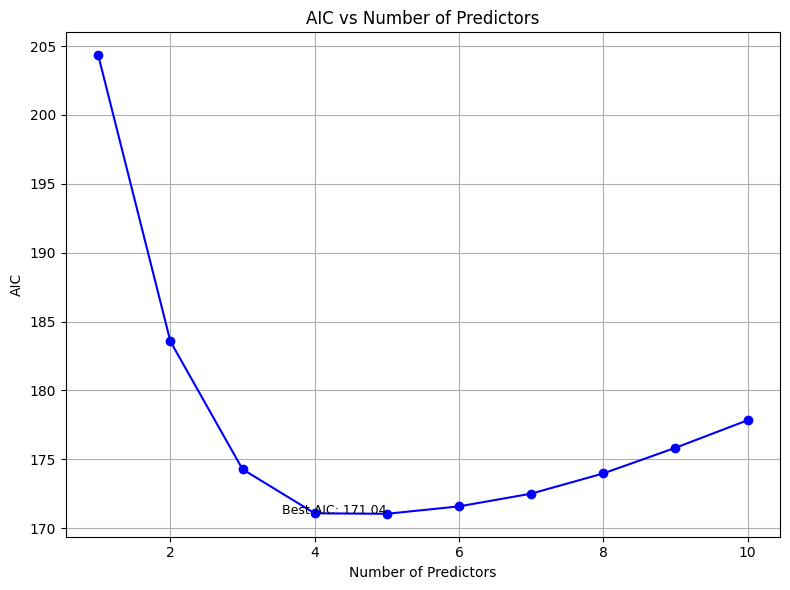

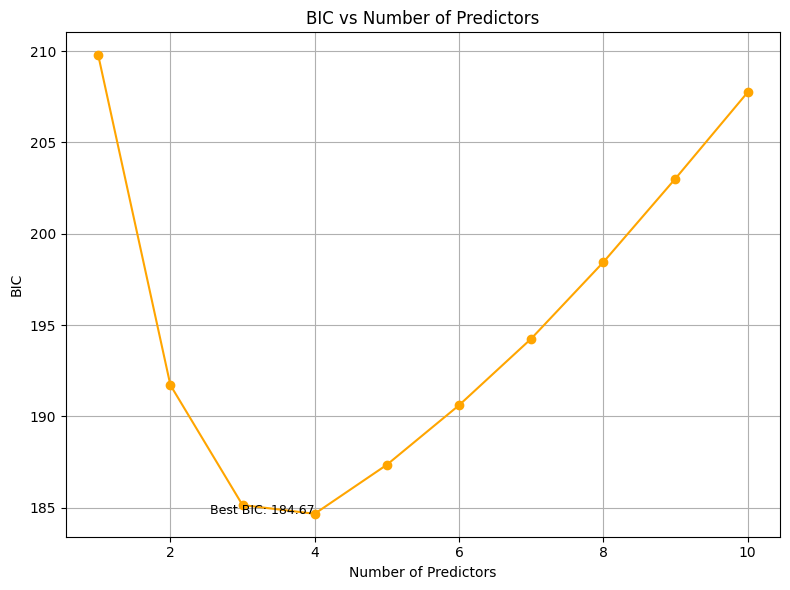

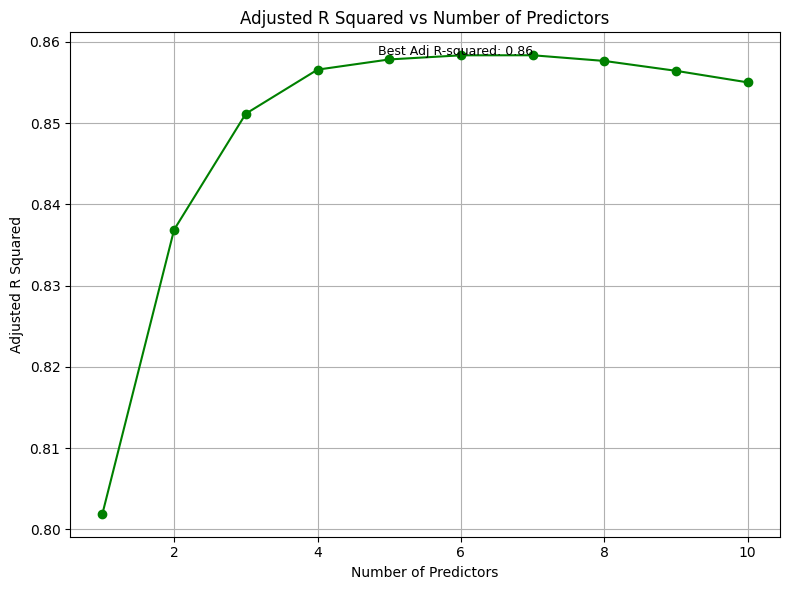

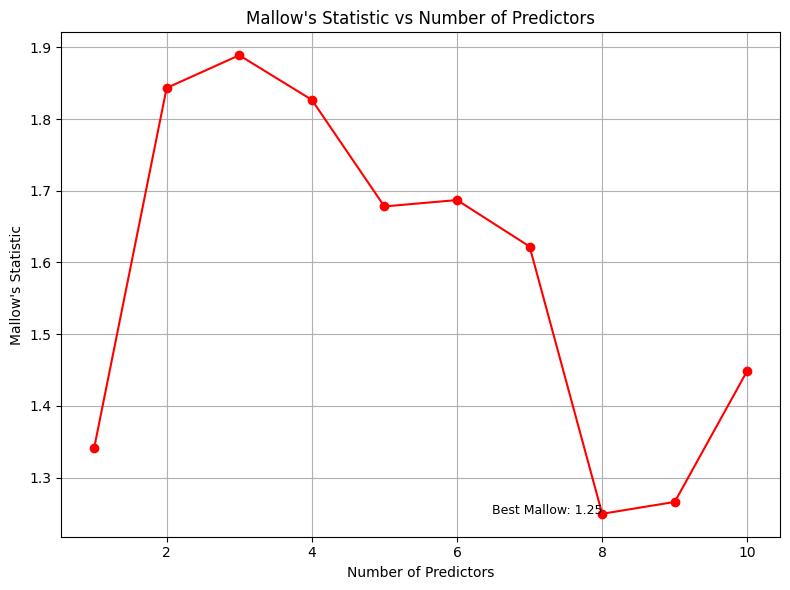

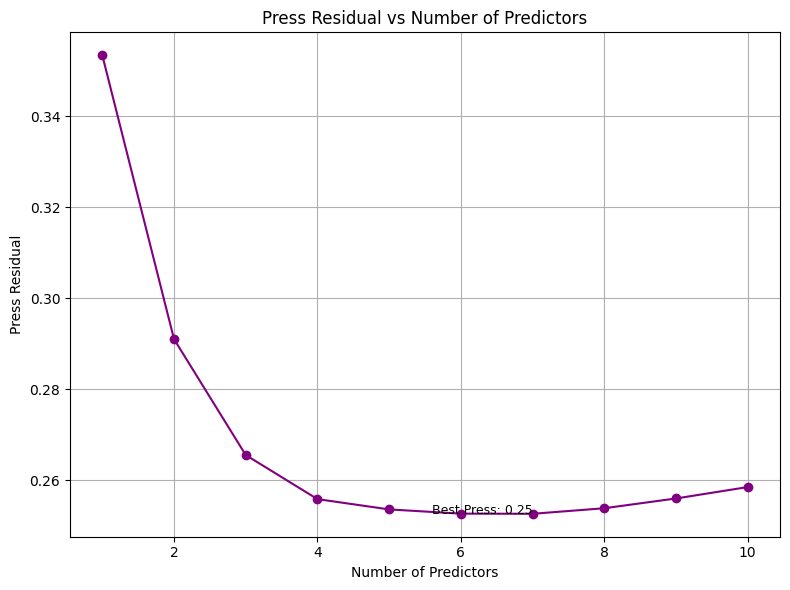

In [ ]:
import matplotlib.pyplot as plt

# Plot line graph for AIC
plt.figure(figsize=(8, 6))
plt.plot(results_df['Number of Predictors'], results_df['AIC'], marker='o', color='blue')
best_aic = results_df.loc[results_df['AIC'].idxmin()]  # Get the row with the minimum AIC value
plt.text(best_aic['Number of Predictors'], best_aic['AIC'], f'Best AIC: {best_aic["AIC"]:.2f}', fontsize=9, ha='right')
plt.title('AIC vs Number of Predictors')
plt.xlabel('Number of Predictors')
plt.ylabel('AIC')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot line graph for BIC
plt.figure(figsize=(8, 6))
plt.plot(results_df['Number of Predictors'], results_df['BIC'], marker='o', color='orange')
best_bic = results_df.loc[results_df['BIC'].idxmin()]  # Get the row with the minimum BIC value
plt.text(best_bic['Number of Predictors'], best_bic['BIC'], f'Best BIC: {best_bic["BIC"]:.2f}', fontsize=9, ha='right')
plt.title('BIC vs Number of Predictors')
plt.xlabel('Number of Predictors')
plt.ylabel('BIC')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot line graph for Adjusted R Squared
plt.figure(figsize=(8, 6))
plt.plot(results_df['Number of Predictors'], results_df['Adjusted R Squared'], marker='o', color='green')
best_adj_r_squared = results_df.loc[results_df['Adjusted R Squared'].idxmax()]  # Get the row with the maximum Adjusted R Squared value
plt.text(best_adj_r_squared['Number of Predictors'], best_adj_r_squared['Adjusted R Squared'], 'Best Adj R-squared: {:.2f}'.format(best_adj_r_squared["Adjusted R Squared"]), fontsize=9, ha='right')
plt.title('Adjusted R Squared vs Number of Predictors')
plt.xlabel('Number of Predictors')
plt.ylabel('Adjusted R Squared')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot line graph for Mallow's Statistic
plt.figure(figsize=(8, 6))
plt.plot(results_df['Number of Predictors'], results_df["Mallow's Statistic"], marker='o', color='red')
best_mallow = results_df.loc[results_df["Mallow's Statistic"].idxmin()]  # Get the row with the minimum Mallow's Statistic value
plt.text(best_mallow['Number of Predictors'], best_mallow["Mallow's Statistic"], 'Best Mallow: {:.2f}'.format(best_mallow["Mallow's Statistic"]), fontsize=9, ha='right')
plt.title("Mallow's Statistic vs Number of Predictors")
plt.xlabel('Number of Predictors')
plt.ylabel("Mallow's Statistic")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot line graph for Press Residual
plt.figure(figsize=(8, 6))
plt.plot(results_df['Number of Predictors'], results_df['Press Residual'], marker='o', color='purple')
best_press = results_df.loc[results_df['Press Residual'].idxmin()]  # Get the row with the minimum Press Residual value
plt.text(best_press['Number of Predictors'], best_press['Press Residual'], 'Best Press: {:.2f}'.format(best_press["Press Residual"]), fontsize=9, ha='right')
plt.title('Press Residual vs Number of Predictors')
plt.xlabel('Number of Predictors')
plt.ylabel('Press Residual')
plt.grid(True)
plt.tight_layout()
plt.show()


# **Best Models**

In [ ]:
# prompt: in the results_df find the select the value of number of predictors column for which AIC is lowest, BIC is lowest, Adjusted R Squared is highest, Mallow's Statistic is lowest, Press Residual is Lowest

# Find the index of the row with the lowest AIC value
min_aic_index = results_df['AIC'].idxmin()

# Find the index of the row with the lowest BIC value
min_bic_index = results_df['BIC'].idxmin()

# Find the index of the row with the highest Adjusted R Squared value
max_adjusted_r_squared_index = results_df['Adjusted R Squared'].idxmax()

# Find the index of the row with the lowest Mallow's Statistic value
min_mallows_index = results_df["Mallow's Statistic"].idxmin()

# Find the index of the row with the lowest Press Residual value
min_press_residual_index = results_df['Press Residual'].idxmin()

# Print the results
print("AIC:", results_df['Number of Predictors'][min_aic_index])
print("BIC:", results_df['Number of Predictors'][min_bic_index])
print("Adjusted R Squared:", results_df['Number of Predictors'][max_adjusted_r_squared_index])
print("Mallow's Statistic:", results_df['Number of Predictors'][min_mallows_index])
print("Press Residual:", results_df['Number of Predictors'][min_press_residual_index])


AIC: 5
BIC: 4
Adjusted R Squared: 7
Mallow's Statistic: 8
Press Residual: 7


In [ ]:
# Best model in case of press residual
model_press = best_models['Press Residual'][results_df['Number of Predictors'][min_press_residual_index]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     97.08
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           1.11e-42
Time:                        21:54:18   Log-Likelihood:                -78.250
No. Observations:                 112   AIC:                             172.5
Df Residuals:                     104   BIC:                             194.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9392      0.322     18.453      0.000       5.301       6.577
x1            -0.0654      0.065     -1.002      0.318      -0.195       0.064
x2            -0.0638      0.053     -1.212      0.228      -0.168       0.041
x3             0.2214      0.072      3.083      0.003       0.079       0.364
x4             0.1196      0.065      1.836      0.069      -0.010       0.249
x7             0.1934      0.172      1.125      0.263      -0.147       0.534
x9             0.9422      0.099      9.517      0.000       0.746       1.139
x10            0.3041      0.088      3.438      0.001       0.129       0.479
==============================================================================
Omnibus:                        4.707   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.095   Jarque-Bera (JB):                4.294
Skew:                          -0.407   Prob(JB):                        0.117
Kurtosis:                       2.492   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Best model in case of mallows statistics
model_mallows = best_models["Mallow's Statistic"][results_df['Number of Predictors'][min_mallows_index]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     39.95
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           2.99e-28
Time:                        21:48:19   Log-Likelihood:                -112.28
No. Observations:                 112   AIC:                             242.6
Df Residuals:                     103   BIC:                             267.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3121      0.489     12.915      0.000       5.343       7.281
x1             0.1517      0.102      1.487      0.140      -0.051       0.354
x2            -0.1600      0.070     -2.273      0.025      -0.300      -0.020
x3             0.3187      0.101      3.145      0.002       0.118       0.520
x4             0.0568      0.095      0.600      0.550      -0.131       0.244
x5            -0.0722      0.079     -0.911      0.365      -0.229       0.085
x7            -0.1149      0.230     -0.499      0.619      -0.572       0.342
x8             0.0778      0.080      0.969      0.335      -0.081       0.237
x10            0.9137      0.083     10.981      0.000       0.749       1.079
==============================================================================
Omnibus:                        3.165   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.205   Jarque-Bera (JB):                2.610
Skew:                           0.269   Prob(JB):                        0.271
Kurtosis:                       3.519   Cond. No.                         27.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Best model in case of AIC
model_aic = best_models['AIC'][results_df['Number of Predictors'][min_aic_index]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     135.0
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           2.65e-44
Time:                        21:29:37   Log-Likelihood:                -79.519
No. Observations:                 112   AIC:                             171.0
Df Residuals:                     106   BIC:                             187.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2978      0.048    131.588      0.000       6.203       6.393
x1            -0.0881      0.063     -1.395      0.166      -0.213       0.037
x3             0.2173      0.071      3.045      0.003       0.076       0.359
x4             0.1389      0.062      2.238      0.027       0.016       0.262
x9             0.9430      0.095      9.967      0.000       0.755       1.131
x10            0.2720      0.086      3.160      0.002       0.101       0.443
==============================================================================
Omnibus:                        4.294   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.117   Jarque-Bera (JB):                3.860
Skew:                          -0.376   Prob(JB):                        0.145
Kurtosis:                       2.488   Cond. No.                         4.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Best model in case of BIC
model_bic = best_models['BIC'][results_df['Number of Predictors'][min_bic_index]]

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     166.7
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           5.01e-45
Time:                        21:39:31   Log-Likelihood:                -80.538
No. Observations:                 112   AIC:                             171.1
Df Residuals:                     107   BIC:                             184.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2995      0.048    131.085      0.000       6.204       6.395
x3             0.1789      0.066      2.705      0.008       0.048       0.310
x4             0.1405      0.062      2.254      0.026       0.017       0.264
x9             0.9146      0.093      9.855      0.000       0.731       1.099
x10            0.2791      0.086      3.233      0.002       0.108       0.450
==============================================================================
Omnibus:                        4.268   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                3.996
Skew:                          -0.397   Prob(JB):                        0.136
Kurtosis:                       2.526   Cond. No.                         3.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Best model in case of adjusted R squared
model_adj_r2 = best_models['Adjusted R Squared'][results_df['Number of Predictors'][max_adjusted_r_squared_index]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     97.08
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           1.11e-42
Time:                        21:58:37   Log-Likelihood:                -78.250
No. Observations:                 112   AIC:                             172.5
Df Residuals:                     104   BIC:                             194.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9392      0.322     18.453      0.000       5.301       6.577
x1            -0.0654      0.065     -1.002      0.318      -0.195       0.064
x2            -0.0638      0.053     -1.212      0.228      -0.168       0.041
x3             0.2214      0.072      3.083      0.003       0.079       0.364
x4             0.1196      0.065      1.836      0.069      -0.010       0.249
x7             0.1934      0.172      1.125      0.263      -0.147       0.534
x9             0.9422      0.099      9.517      0.000       0.746       1.139
x10            0.3041      0.088      3.438      0.001       0.129       0.479
==============================================================================
Omnibus:                        4.707   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.095   Jarque-Bera (JB):                4.294
Skew:                          -0.407   Prob(JB):                        0.117
Kurtosis:                       2.492   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
models = [model_aic, model_bic, model_adj_r2, model_mallows, model_press, model_forward, model_backward, model_stepwise]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     166.7
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           5.01e-45
Time:                        22:07:10   Log-Likelihood:                -80.538
No. Observations:                 112   AIC:                             171.1
Df Residuals:                     107   BIC:                             184.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2995      0.048    131.085      0.000       6.204       6.395
x9             0.9146      0.093      9.855      0.000       0.731       1.099
x4             0.1405      0.062      2.254      0.026       0.017       0.264
x10            0.2791      0.086      3.233      0.002       0.108       0.450
x3             0.1789      0.066      2.705      0.008       0.048       0.310
==============================================================================
Omnibus:                        4.268   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.118   Jarque-Bera (JB):                3.996
Skew:                          -0.397   Prob(JB):                        0.136
Kurtosis:                       2.526   Cond. No.                         3.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
 def BF_test(res, n):
    res_1 = np.array(res)[0:n//2]
    res_2 = np.array(res)[n//2: 112]
    n1 = n//2
    n2 = n-n1
    e1_tilda = np.median(res_1)
    e2_tilda = np.median(res_2)

    abs_dev_1 = np.abs(res_1 - e1_tilda)
    abs_dev_2 = np.abs(res_2 - e2_tilda)

    d1_bar = np.mean(abs_dev_1)
    d2_bar = np.mean(abs_dev_2)

    s2 = (np.sum((abs_dev_1 - d1_bar)**2) + np.sum((abs_dev_2 - d2_bar)**2))/(n-2)
    ts = (d1_bar - d2_bar)/((s2*((1/n1)+(1/n2)))**0.5)

    alpha=0.05
    df=n-2

    p_value = 1 - t.cdf(ts,df)
    print("P value of Brown Forsythe test: ", p_value)


    t_tab = t.ppf(1 - alpha/2, df)
    if(abs(ts)>t_tab):
      print("There is heteroscedasticity")
    else:
      print("There is homoscedasticity.")

# **Validating best models for each criterion**

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     97.08
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           1.11e-42
Time:                        22:01:01   Log-Likelihood:                -78.250
No. Observations:                 112   AIC:                             172.5
Df Residuals:                     104   BIC:                             194.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9392      0.322     18.453      0.0

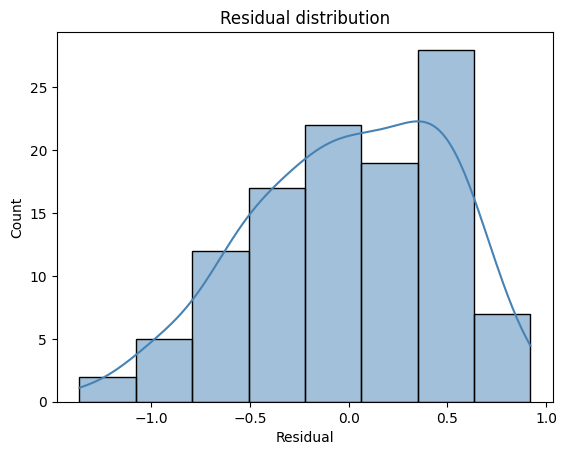

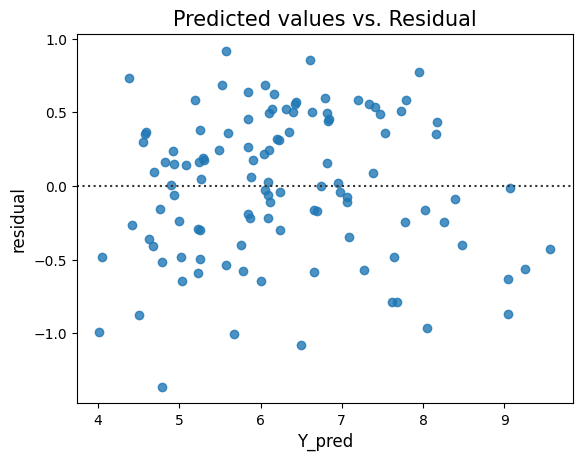

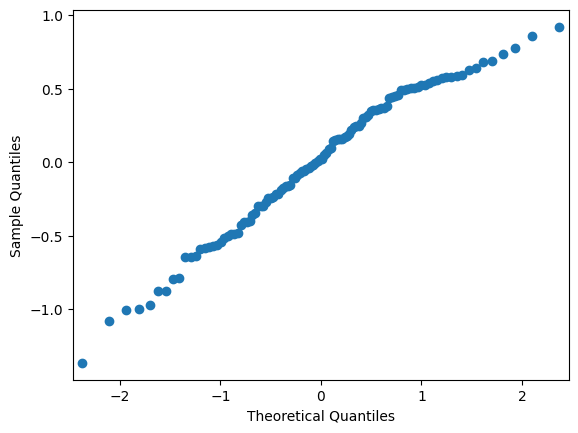

P value of Brown Forsythe test:  0.7035134867969384
There is homoscedasticity.


In [ ]:
adj_r2_columns = ['x1', 'x2', 'x3', 'x4', 'x7', 'x9', 'x10']
X = df[adj_r2_columns]
X = sm.add_constant(X)
print(model_adj_r2.summary())

# Calculating Residuals
Y_pred = model_adj_r2.predict(X)
residual = Y-Y_pred

# Checking normality of residuals
sns.histplot(residual, kde=True, color="steelblue")
plt.xlabel("Residual")
plt.title("Residual distribution")
plt.show()

# Residual plot
sns.residplot(x=Y_pred, y=residual)
plt.xlabel("Y_pred", fontsize = 12)
plt.ylabel("residual", fontsize = 12)
plt.title("Predicted values vs. Residual", fontsize=15)
plt.show()

# QQ plot
# sm.qqplot(residual)
sm.qqplot(residual)
plt.show()

# Brown Forsythe for checking homoskedasticity
BF_test(residual, len(residual))

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     135.0
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           2.65e-44
Time:                        21:47:22   Log-Likelihood:                -79.519
No. Observations:                 112   AIC:                             171.0
Df Residuals:                     106   BIC:                             187.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2978      0.048    131.588      0.0

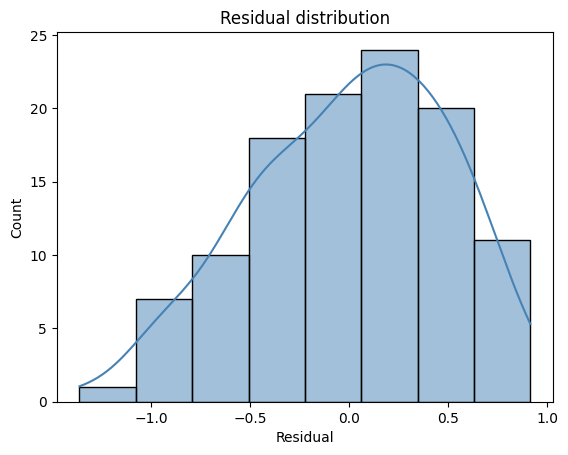

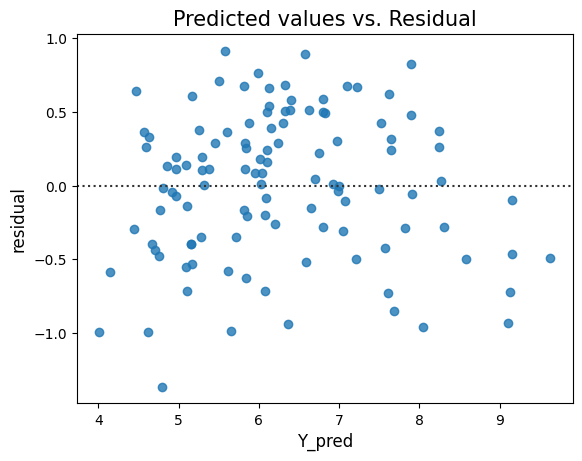

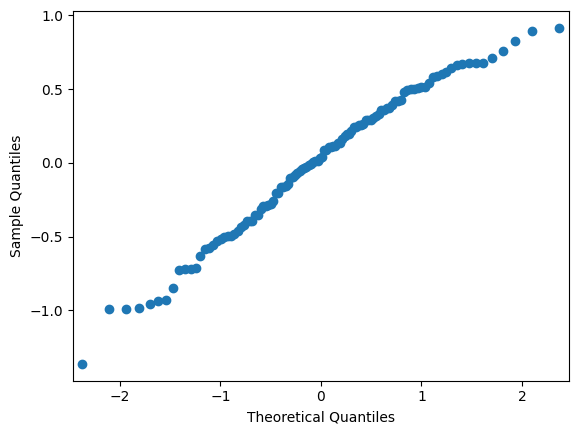

P value of Brown Forsythe test:  0.7220658649641678
There is homoscedasticity.


In [ ]:
aic_columns = ['x1' , 'x3', 'x4', 'x9', 'x10']
X = df[aic_columns]
X = sm.add_constant(X)
print(model_aic.summary())

# Calculating Residuals
Y_pred = model_aic.predict(X)
residual = Y-Y_pred

# Checking normality of residuals
sns.histplot(residual, kde=True, color="steelblue")
plt.xlabel("Residual")
plt.title("Residual distribution")
plt.show()

# Residual plot
sns.residplot(x=Y_pred, y=residual)
plt.xlabel("Y_pred", fontsize = 12)
plt.ylabel("residual", fontsize = 12)
plt.title("Predicted values vs. Residual", fontsize=15)
plt.show()

# QQ plot
# sm.qqplot(residual)
sm.qqplot(residual)
plt.show()

# Brown Forsythe for checking homoskedasticity
BF_test(residual, len(residual))

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     166.7
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           5.01e-45
Time:                        21:51:38   Log-Likelihood:                -80.538
No. Observations:                 112   AIC:                             171.1
Df Residuals:                     107   BIC:                             184.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2995      0.048    131.085      0.0

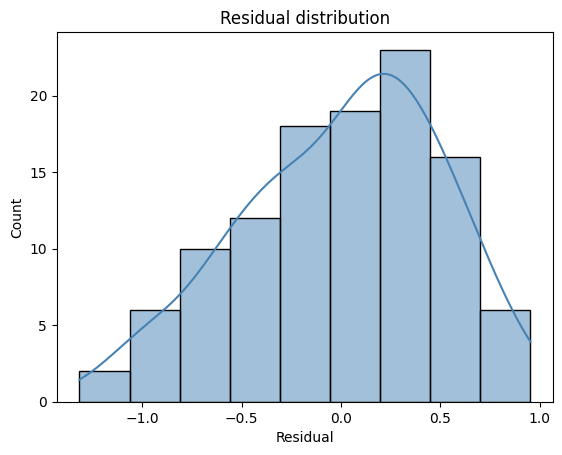

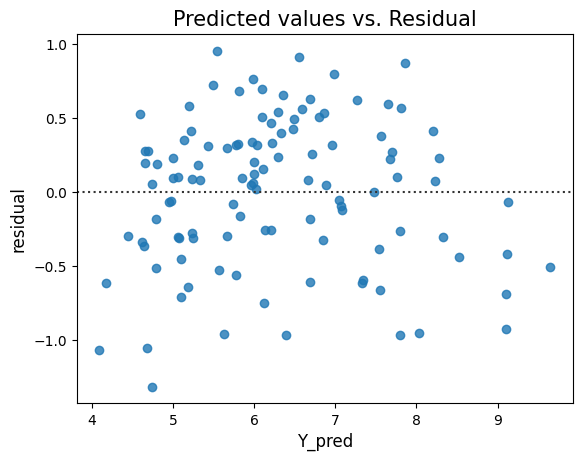

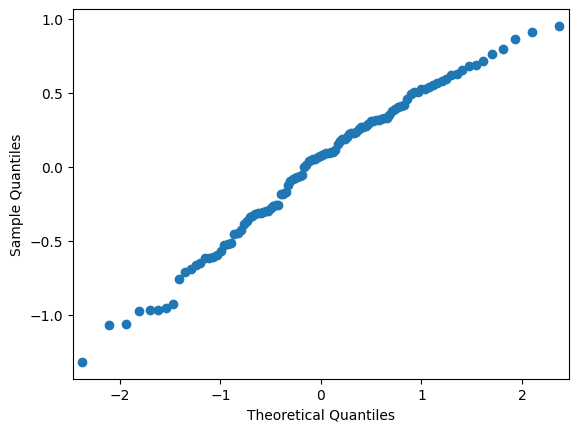

P value of Brown Forsythe test:  0.7033500909962516
There is homoscedasticity.


In [ ]:
bic_columns = ['x3', 'x4', 'x9', 'x10']
X = df[bic_columns]
X = sm.add_constant(X)
print(model_bic.summary())

# Calculating Residuals
Y_pred = model_bic.predict(X)
residual = Y-Y_pred

# Checking normality of residuals
sns.histplot(residual, kde=True, color="steelblue")
plt.xlabel("Residual")
plt.title("Residual distribution")
plt.show()

# Residual plot
sns.residplot(x=Y_pred, y=residual)
plt.xlabel("Y_pred", fontsize = 12)
plt.ylabel("residual", fontsize = 12)
plt.title("Predicted values vs. Residual", fontsize=15)
plt.show()

# QQ plot
# sm.qqplot(residual)
sm.qqplot(residual)
plt.show()

# Brown Forsythe for checking homoskedasticity
BF_test(residual, len(residual))



                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     39.95
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           2.99e-28
Time:                        21:53:18   Log-Likelihood:                -112.28
No. Observations:                 112   AIC:                             242.6
Df Residuals:                     103   BIC:                             267.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3121      0.489     12.915      0.0

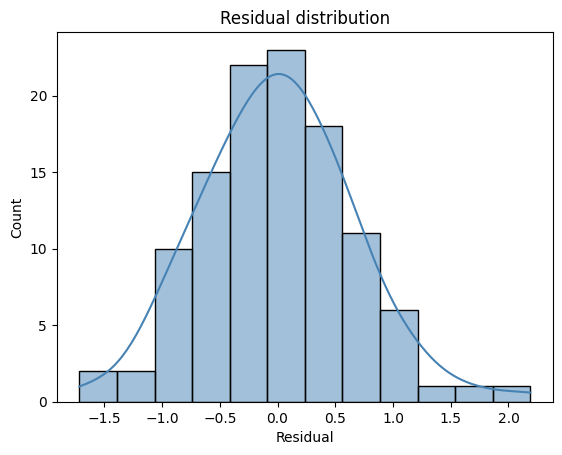

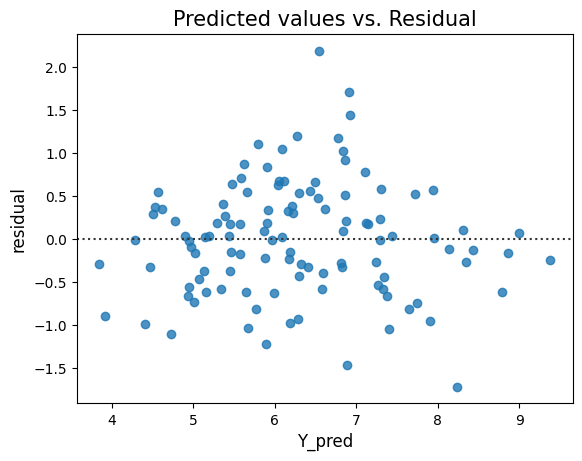

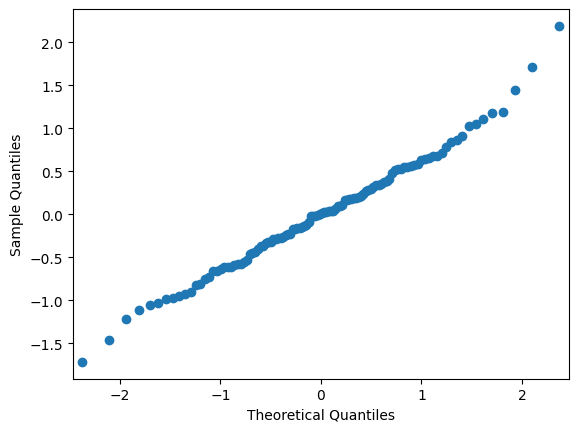

P value of Brown Forsythe test:  0.9394699308283407
There is homoscedasticity.


In [ ]:
mallows_columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x7', 'x8', 'x10']
X = df[mallows_columns]
X = sm.add_constant(X)
print(model_mallows.summary())

# Calculating Residuals
Y_pred = model_mallows.predict(X)
residual = Y-Y_pred

# Checking normality of residuals
sns.histplot(residual, kde=True, color="steelblue")
plt.xlabel("Residual")
plt.title("Residual distribution")
plt.show()

# Residual plot
sns.residplot(x=Y_pred, y=residual)
plt.xlabel("Y_pred", fontsize = 12)
plt.ylabel("residual", fontsize = 12)
plt.title("Predicted values vs. Residual", fontsize=15)
plt.show()

# QQ plot
# sm.qqplot(residual)
sm.qqplot(residual)
plt.show()

# Brown Forsythe for checking homoskedasticity
BF_test(residual, len(residual))



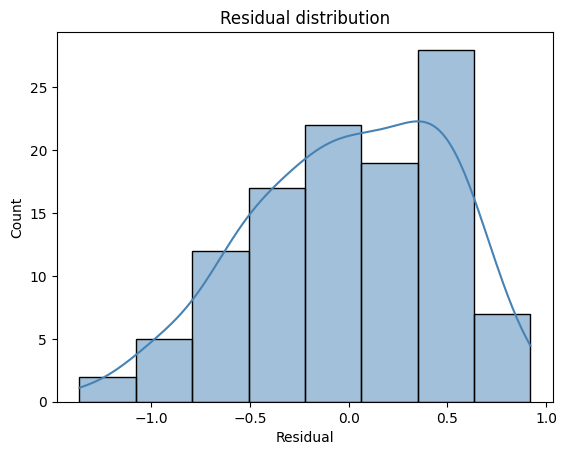

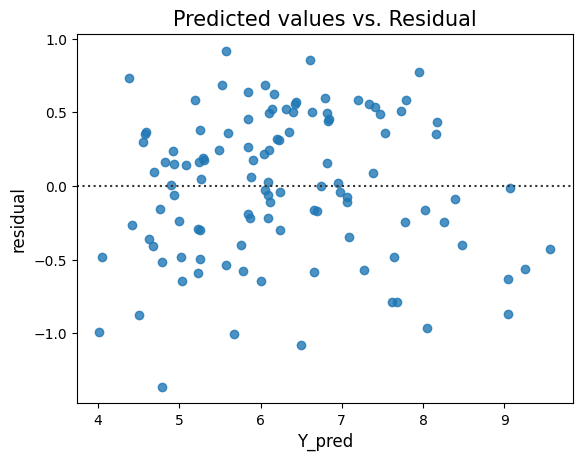

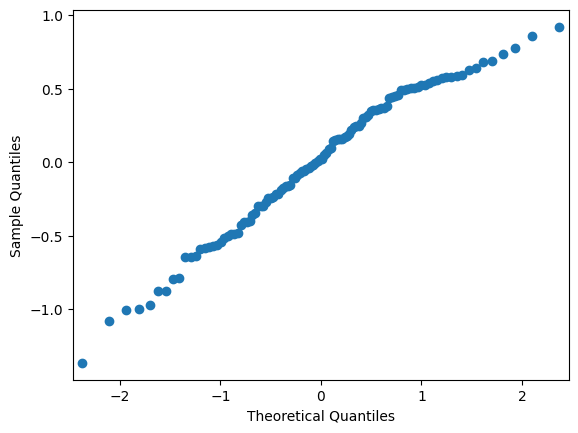

P value of Brown Forsythe test:  0.7035134867969384
There is homoscedasticity.


In [ ]:
press_columns = ['x1', 'x2', 'x3', 'x4', 'x7', 'x9', 'x10']
X = df[press_columns]
X = sm.add_constant(X)

# Calculating Residuals
Y_pred = model_press.predict(X)
residual = Y-Y_pred

# Checking normality of residuals
sns.histplot(residual, kde=True, color="steelblue")
plt.xlabel("Residual")
plt.title("Residual distribution")
plt.show()

# Residual plot
sns.residplot(x=Y_pred, y=residual)
plt.xlabel("Y_pred", fontsize = 12)
plt.ylabel("residual", fontsize = 12)
plt.title("Predicted values vs. Residual", fontsize=15)
plt.show()

# QQ plot
# sm.qqplot(residual)
sm.qqplot(residual)
plt.show()

# Brown Forsythe for checking homoskedasticity
BF_test(residual, len(residual))



                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     166.7
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           5.01e-45
Time:                        22:04:34   Log-Likelihood:                -80.538
No. Observations:                 112   AIC:                             171.1
Df Residuals:                     107   BIC:                             184.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x3             0.1789      0.066      2.705      0.0

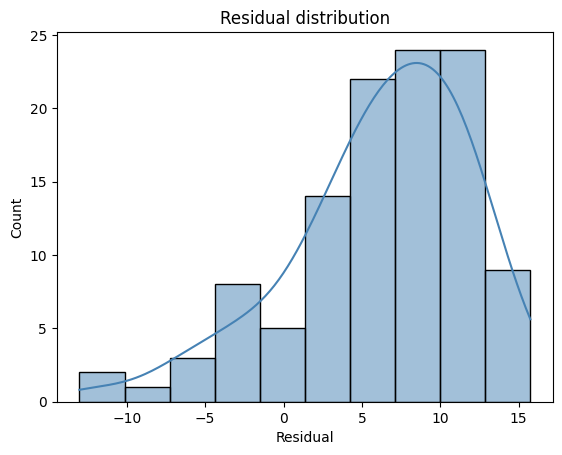

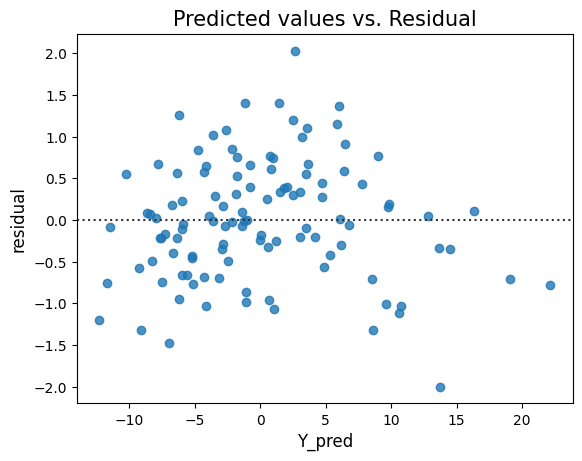

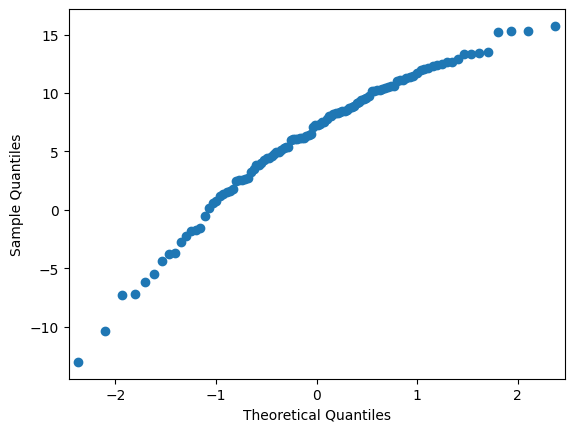

P value of Brown Forsythe test:  0.5546717526595826
There is homoscedasticity.


In [ ]:
backward_columns = [ 'x3', 'x4', 'x9', 'x10']
X = df[backward_columns]
X = sm.add_constant(X)
print(model_backward.summary())

# Calculating Residuals
Y_pred = model_backward.predict(X)
residual = Y-Y_pred

# Checking normality of residuals
sns.histplot(residual, kde=True, color="steelblue")
plt.xlabel("Residual")
plt.title("Residual distribution")
plt.show()

# Residual plot
sns.residplot(x=Y_pred, y=residual)
plt.xlabel("Y_pred", fontsize = 12)
plt.ylabel("residual", fontsize = 12)
plt.title("Predicted values vs. Residual", fontsize=15)
plt.show()

# QQ plot
# sm.qqplot(residual)
sm.qqplot(residual)
plt.show()

# Brown Forsythe for checking homoskedasticity
BF_test(residual, len(residual))

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     166.7
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           5.01e-45
Time:                        22:05:59   Log-Likelihood:                -80.538
No. Observations:                 112   AIC:                             171.1
Df Residuals:                     107   BIC:                             184.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2995      0.048    131.085      0.0

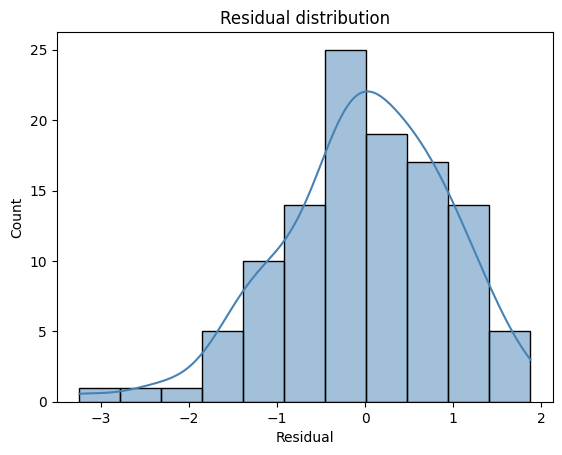

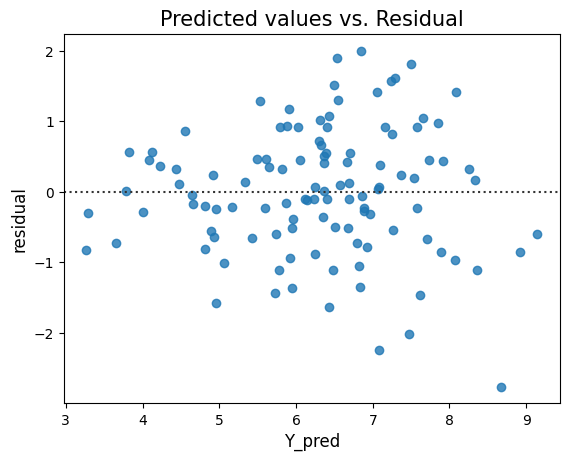

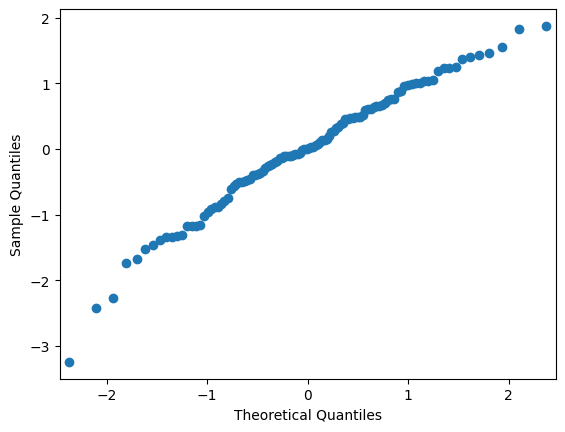

P value of Brown Forsythe test:  0.1619886296898604
There is homoscedasticity.


In [ ]:
forward_columns = [ 'x3', 'x4', 'x9', 'x10']
X = df[forward_columns]
X = sm.add_constant(X)
print(model_forward.summary())

# Calculating Residuals
Y_pred = model_forward.predict(X)
residual = Y-Y_pred

# Checking normality of residuals
sns.histplot(residual, kde=True, color="steelblue")
plt.xlabel("Residual")
plt.title("Residual distribution")
plt.show()

# Residual plot
sns.residplot(x=Y_pred, y=residual)
plt.xlabel("Y_pred", fontsize = 12)
plt.ylabel("residual", fontsize = 12)
plt.title("Predicted values vs. Residual", fontsize=15)
plt.show()

# QQ plot
# sm.qqplot(residual)
sm.qqplot(residual)
plt.show()

# Brown Forsythe for checking homoskedasticity
BF_test(residual, len(residual))

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     166.7
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           5.01e-45
Time:                        22:07:59   Log-Likelihood:                -80.538
No. Observations:                 112   AIC:                             171.1
Df Residuals:                     107   BIC:                             184.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2995      0.048    131.085      0.0

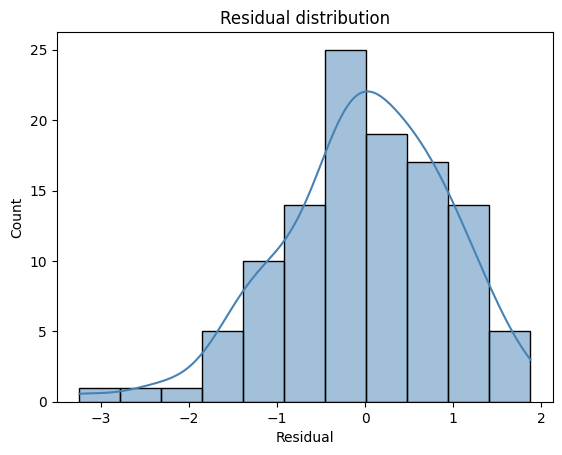

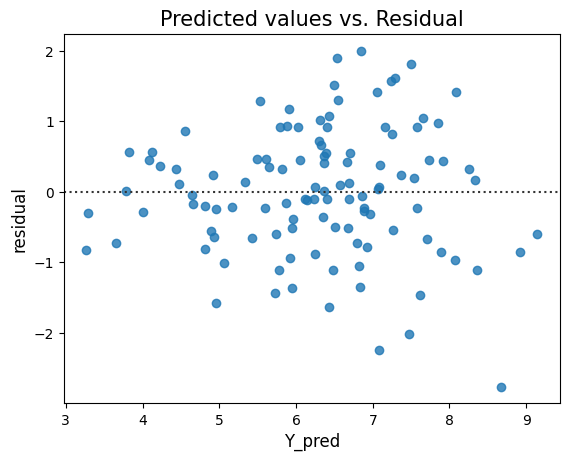

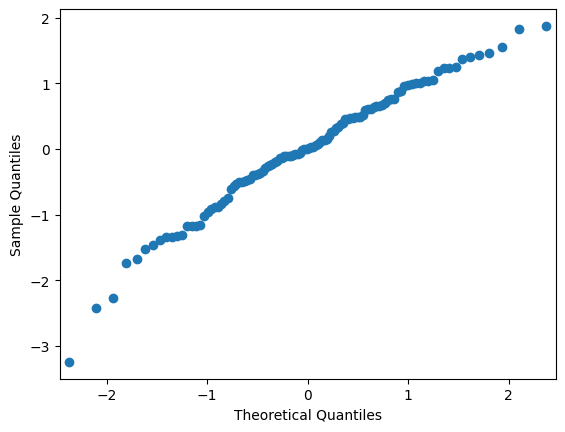

P value of Brown Forsythe test:  0.1619886296898604
There is homoscedasticity.


In [ ]:
stepwise_columns = [ 'x3', 'x4', 'x9', 'x10']
X = df[stepwise_columns]
X = sm.add_constant(X)
print(model_stepwise.summary())

# Calculating Residuals
Y_pred = model_stepwise.predict(X)
residual = Y-Y_pred

# Checking normality of residuals
sns.histplot(residual, kde=True, color="steelblue")
plt.xlabel("Residual")
plt.title("Residual distribution")
plt.show()

# Residual plot
sns.residplot(x=Y_pred, y=residual)
plt.xlabel("Y_pred", fontsize = 12)
plt.ylabel("residual", fontsize = 12)
plt.title("Predicted values vs. Residual", fontsize=15)
plt.show()

# QQ plot
# sm.qqplot(residual)
sm.qqplot(residual)
plt.show()

# Brown Forsythe for checking homoskedasticity
BF_test(residual, len(residual))

# **VIF**

In [ ]:
df_new = df_new.reset_index()

In [ ]:
df_new.drop("index", axis = 1, inplace = True)

In [ ]:
df_new

In [ ]:
X = df_new[input_columns]
y = df_new['Y']

In [ ]:
sns.heatmap( df_new.corr(), annot = True, cmap = 'coolwarm')
plt.title("heatmap to show coorelation in dataset")
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate VIF for the features used in the model
# Assuming X_train is a DataFrame containing your feature variables
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns  # Column names of your feature variables
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)

In [ ]:
X.columns

In [ ]:
X = df[['x1', 'x2', 'x3', 'x4', 'x9', 'x10']]
Y = df['Y']

In [ ]:
X = sm.add_constant(X)

model_vif = sm.OLS(Y, X).fit()

In [ ]:
model_vif.summary()

# New work

The new df_new is then dataframe we obtained after removing influential observation from the data using cooks distance